In [33]:
#Zadanie: przestępczość

#    Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
#    Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały
#one oznaki choroby psychicznej (‘signs_of_mental_illness’).
#    Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej 
#dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
#Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres
#kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
#    Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów.
#Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000
#mieszkańców każdego ze stanów.

import pandas as pd

df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()
df.set_index('id')


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False


In [34]:
#Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały
#one oznaki choroby psychicznej (‘signs_of_mental_illness’).
summary = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='count')
display(summary)

,race,signs_of_mental_illness,count
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745
5,H,True,157
6,N,False,64
7,N,True,14
8,O,False,37
9,O,True,11


In [35]:
#Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej 
#dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
summary['total_per_race'] = summary.groupby('race')['count'].transform('sum') # .transform('sum') powoduje ze Suma danej rasy będzie powielona w każdym wierszu tej grupy.
summary['proportion_mental_illness'] = summary.apply(lambda row: row['count'] /row['total_per_race'], axis=1)
max_mental_illness = summary[(summary['proportion_mental_illness'] == summary['proportion_mental_illness']) & (summary['signs_of_mental_illness'] == True)]
max_mental_illness_calculation = max_mental_illness.max()
max_mental_illness = max_mental_illness[max_mental_illness['proportion_mental_illness'] == max_mental_illness_calculation['proportion_mental_illness']]
max_mental_illness

,race,signs_of_mental_illness,count,total_per_race,proportion_mental_illness
11,W,True,713,2476,0.287964


In [36]:
#Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres
#kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
df['Day_name'] = pd.to_datetime(df['date']).dt.day_name()  # wyciągniecie nazwy dnia tyg 
df['week_day'] = pd.to_datetime(df['date']).dt.weekday     # wyciągniecie nr dnai tygodnia 0 = Poniedizałek itd)
a = df.groupby(['week_day','Day_name']).size().reset_index(name='count')
a

,week_day,Day_name,count
0,0,Monday,726
1,1,Tuesday,816
2,2,Wednesday,829
3,3,Thursday,810
4,4,Friday,761
5,5,Saturday,721
6,6,Sunday,753


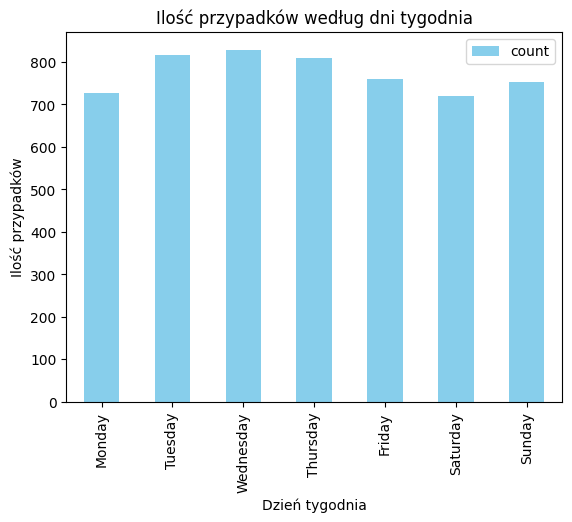

In [37]:
import matplotlib.pyplot as plt

a.plot(kind='bar', x='Day_name', y='count', color='skyblue')


plt.title('Ilość przypadków według dni tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Ilość przypadków')

plt.show()

In [38]:
#Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów.
state_by_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
state_by_population = pd.DataFrame(state_by_population[0])

In [39]:
state_shortname = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
state_shortname = pd.DataFrame(state_shortname[1])

In [40]:
#Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000
#mieszkańców każdego ze stanów.
a = pd.merge(state_by_population,state_shortname,how ='left', left_on='State', right_on='Name')
a['Populacja'] = a['Census population, April 1, 2020 [1][2]']/1000
a

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,...,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations,Populacja
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,...,State,US-CA,CA,6.0,CA,CF,Calif.,Calif.,Cal.,39538.223
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,...,State,US-TX,TX,48.0,TX,TX,Tex.,Texas,NaN,30145.505
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,...,State,US-FL,FL,12.0,FL,FL,Fla.,Fla.,NaN,21538.187
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,...,State,US-NY,NY,36.0,NY,NY,N.Y.,N.Y.,N. York[3],20201.249
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,...,State,US-PA,PA,42.0,PA,PA,Pa.,Pa.,"Penn.,[2] Penna.[5]",13002.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,56,56,Northern Mariana Islands,47329,53883,−12.2%,"−6,554",1 (non-voting),—,—,...,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN,47.329
58,—,—,Contiguous United States,329260619,306675006,7.4%,+22585613,432 (+ 1 non-voting),627163,757745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329260.619
59,—,—,The fifty states,330759736,308143815,7.3%,+22615921,435,621729,755796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330759.736
60,—,—,Fifty states + D.C.,331449281,308745538,7.4%,+22703743,435 (+ 1 non-voting),619531,—,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331449.281


In [41]:
tabela_z_populacja = df.groupby(['state']).size().reset_index(name = 'ilość_zbrodni')
tabela_z_populacja = pd.merge(tabela_z_populacja,a[['State','ANSI', 'Populacja']], how ='left', left_on ='state', right_on = 'ANSI')
tabela_z_populacja['Odsetek_śmiertelnych_interwencji_na_1000_mieszkańców'] = \
    round((tabela_z_populacja['ilość_zbrodni'] / tabela_z_populacja['Populacja']), 2)
tabela_z_populacja.rename(columns={'ilość_zbrodni': 'Liczba_przestępstw','Populacja': 'Populacja (w tys.)'}, inplace=True)
tabela_z_populacja[['State', 'Liczba_przestępstw', 'Populacja (w tys.)', 'Odsetek_śmiertelnych_interwencji_na_1000_mieszkańców']]

,State,Liczba_przestępstw,Populacja (w tys.),Odsetek_śmiertelnych_interwencji_na_1000_mieszkańców
0,Alaska,39,733.391,0.05
1,Alabama,104,5024.279,0.02
2,Arkansas,83,3011.524,0.03
3,Arizona,254,7151.502,0.04
4,California,799,39538.223,0.02
5,Colorado,195,5773.714,0.03
6,Connecticut,21,3605.944,0.01
7,District of Columbia,13,689.545,0.02
8,Delaware,13,989.948,0.01
9,Florida,350,21538.187,0.02
